In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [17]:
feat_arr = [{'name':'hemoglobin', 'lower':12.1, 'upper':17.2, 'mean':10.3, 'std':2.3, 'min':(0, 5)},
            {'name':'ferritin', 'lower':10, 'upper':263, 'mean':697, 'std':3305, 'min':(1.6, 8)},
            {'name':'ret_count', 'lower':0.5, 'upper':2.5, 'mean':2.6, 'std':2.5, 'min':(0, 0.5)},
            {'name':'segmented_neutrophils', 'lower':0, 'upper':0, 'mean':0, 'std':2.4, 'min':(0, 0)},
            {'name':'iron', 'lower':60, 'upper':170, 'mean':50, 'std':44, 'min':(0.9, 40)},
            {'name':'tibc', 'lower':250, 'upper':450, 'mean':242, 'std':90, 'min':(3, 100)},
            {'name':'rbc', 'lower':3.92, 'upper':5.65, 'mean':3.5, 'std':0.8, 'min':(0, 3)},
            {'name':'mcv', 'lower':80, 'upper':100, 'mean':90, 'std':8, 'min':(0, 65)}]

#### Creating normal hemoglobin dataset

In [18]:
cols_to_use = [feat['name'] for feat in feat_arr if feat['name'] not in ['iron', 'rbc']]
nan_fractions = [1.0, 0.6, 0.3, 0.1, 0.6, 0.8]
cols_to_use

['hemoglobin', 'ferritin', 'ret_count', 'segmented_neutrophils', 'tibc', 'mcv']

In [19]:
synth_hb_df = pd.DataFrame()
for i in feat_arr:
    if i['name'] in cols_to_use:
        lst_idx = cols_to_use.index(i['name'])
        synth_hb_df[i['name']] = np.random.uniform(i['lower'], i['upper'], 10000)
        synth_hb_df[i['name']] = synth_hb_df[i['name']].sample(frac=nan_fractions[lst_idx])
synth_hb_df['label'] = 'No anemia'
synth_hb_df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,label
0,14.010155,NaN,NaN,NaN,345.481644,91.442937,No anemia
1,16.948643,NaN,NaN,NaN,NaN,97.958187,No anemia
2,15.833169,171.449291,0.800313,NaN,363.985025,96.683212,No anemia
3,15.153158,NaN,NaN,NaN,NaN,85.347757,No anemia
4,12.895695,96.569765,NaN,NaN,271.622851,NaN,No anemia


In [20]:
synth_hb_df.isna().sum()

hemoglobin                  0
ferritin                 4000
ret_count                7000
segmented_neutrophils    9000
tibc                     4000
mcv                      2000
label                       0
dtype: int64

In [21]:
synth_hb_df.describe()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv
count,10000.000000,6000.000000,3000.000000,1000.0,6000.000000,8000.000000
mean,14.620214,137.008678,1.510928,0.0,349.515381,89.935405
std,1.466914,73.190153,0.577518,0.0,57.136086,5.770953
min,12.100059,10.002352,0.500406,0.0,250.026002,80.006622
25%,13.356277,73.978997,1.023732,0.0,299.915333,84.868078
50%,14.611896,136.345683,1.501286,0.0,349.882057,89.977931
75%,15.874032,201.072785,2.017250,0.0,399.100208,94.913663
max,17.198560,262.972439,2.498595,0.0,449.973440,99.998240


#### Reading anemic synth dataset

In [22]:
#non_hb_df = pd.read_csv('data/anemia_synth_dataset_some_filled.csv')
non_hb_df = pd.read_csv('data/anemia_synth_dataset_with_unspecified.csv')
non_hb_df = non_hb_df.drop(['mentzer_index', 'iron', 'rbc'], axis=1)
non_hb_df['hemoglobin'] = np.random.uniform(1, 12, len(non_hb_df))
non_hb_df = non_hb_df[cols_to_use + ['label']]
non_hb_df= non_hb_df[non_hb_df.label!='Thalassemia']
non_hb_df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,label
0,5.231766,NaN,0.253194,NaN,NaN,88.164375,Aplastic anemia
1,2.382725,99.558391,0.087604,NaN,NaN,87.223193,Aplastic anemia
2,4.768318,134.020515,9.093607,NaN,NaN,82.525400,Hemolytic anemia
3,5.743648,NaN,0.292759,0.000000,NaN,96.353048,Aplastic anemia
4,2.772130,129.481445,1.717516,1.698862,NaN,103.899232,Vitamin B12/Folate deficiency anemia


In [23]:
non_hb_df.isna().sum()

hemoglobin                   0
ferritin                 18742
ret_count                 4470
segmented_neutrophils    18764
tibc                     18742
mcv                          0
label                        0
dtype: int64

In [24]:
synth_hb_df.isna().sum()

hemoglobin                  0
ferritin                 4000
ret_count                7000
segmented_neutrophils    9000
tibc                     4000
mcv                      2000
label                       0
dtype: int64

#### Combining the dataframes

In [25]:
hb_df = pd.concat([synth_hb_df, non_hb_df], axis=0)
hb_df = hb_df.sample(frac=1, random_state = SEED).reset_index(drop=True)
#hb_df = hb_df.fillna(0)
hb_df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,label
0,6.780822,NaN,0.765900,NaN,NaN,94.832889,Aplastic anemia
1,8.273517,NaN,1.886329,NaN,255.874605,80.271248,Aplastic anemia
2,6.476354,NaN,2.242322,NaN,NaN,96.768764,Hemolytic anemia
3,9.667797,NaN,0.764684,0.0,NaN,114.090607,Unspecified anemia
4,1.239798,NaN,6.775830,0.0,NaN,87.933601,Hemolytic anemia


In [26]:
hb_df.tail()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,label
39982,14.654471,189.449579,0.852599,NaN,NaN,95.737308,No anemia
39983,5.310422,NaN,4.146689,NaN,NaN,98.090707,Hemolytic anemia
39984,11.529573,250.921463,5.813760,NaN,NaN,99.231139,Hemolytic anemia
39985,16.055191,NaN,NaN,NaN,340.54774,NaN,No anemia
39986,5.708435,157.133032,4.737997,NaN,NaN,86.344622,Hemolytic anemia


In [27]:
hb_df.label.unique()

array(['Aplastic anemia', 'Hemolytic anemia', 'Unspecified anemia',
       'Anemia of chronic disease', 'No anemia', 'Iron deficiency anemia',
       'Vitamin B12/Folate deficiency anemia'], dtype=object)

In [28]:
hb_df.to_csv('data/anemia_synth_dataset_hb_with_unspecified.csv', index=False)

In [15]:
#hb_df.to_csv('data/anemia_synth_dataset_hb_some_nans.csv', index=False)

#### Data analysis

In [127]:
analytic_df = pd.read_csv('data/anemia_synth_dataset_hb_some_nans.csv')
analytic_df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,label
0,12.176139,13.829445,0.000000,0.0,0.000000,82.648043,No anemia
1,2.691116,0.000000,5.445103,0.0,334.674350,95.635788,Hemolytic anemia
2,14.139714,44.223073,0.000000,0.0,0.000000,94.631075,No anemia
3,11.946911,202.228906,4.032461,0.0,0.000000,99.628591,Hemolytic anemia
4,6.543366,0.000000,3.420648,0.0,421.689813,99.829839,Hemolytic anemia


In [51]:
analytic_df.label.value_counts()

Hemolytic anemia                        14146
No anemia                               10000
Aplastic anemia                          9450
Anemia of chronic disease                1869
Vitamin B12/Folate deficiency anemia     1575
Iron deficiency anemia                   1343
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

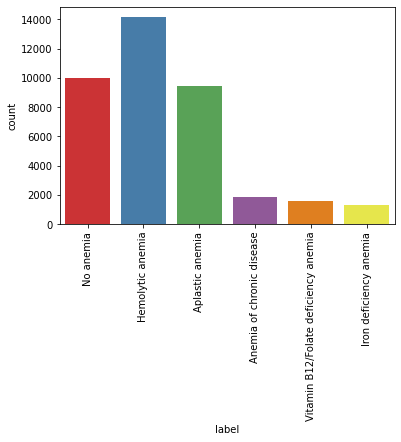

In [47]:
plt.xticks(rotation=90)
sns.countplot(x='label', data=analytic_df, palette = 'Set1')

In [48]:
isna_series = analytic_df.isna().sum()

In [49]:
def plot_feature_frequencies(df):
    output_df  = pd.DataFrame()
    for col in df.columns:
        if col != 'label':
            missing_num = df.isna().sum()[col]
            present_num = df.notna().sum()[col]
            col_dict = {'feature name':col, 'present': present_num, 'missing':missing_num,}
            output_df = output_df.append(col_dict, ignore_index=True)
    output_df = output_df[['feature name', 'present', 'missing']]
    output_df.plot(x='feature name', kind='bar', figsize=(8,6), stacked=True)
    return output_df

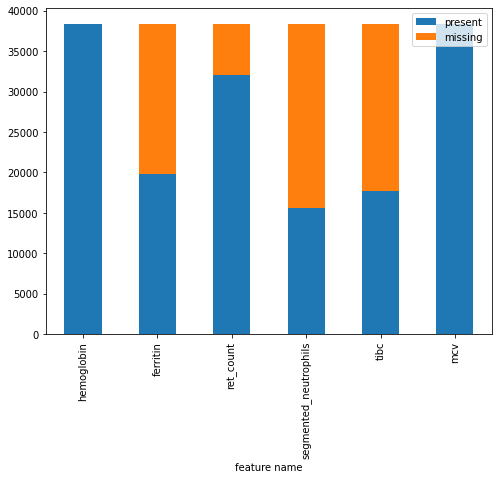

In [50]:
output_df = plot_feature_frequencies(analytic_df)

#### Filling nans with normal values

In [81]:
nan_df = hb_df.copy()
nan_df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,label
0,12.442170,167.275524,1.341424,0.0,NaN,97.382663,No anemia
1,8.392233,NaN,6.501167,NaN,NaN,92.195492,Hemolytic anemia
2,10.804115,NaN,5.799928,NaN,NaN,89.732722,Hemolytic anemia
3,15.232526,239.655346,0.853124,0.0,252.363317,93.776990,No anemia
4,12.615418,165.499679,2.279108,0.0,447.558641,84.541755,No anemia


In [82]:
len(nan_df)

38383

In [83]:
nan_df.isna().sum()

hemoglobin                   0
ferritin                 26171
ret_count                 7787
segmented_neutrophils    30808
tibc                     28171
mcv                          0
label                        0
dtype: int64

In [84]:
def replace_nans(df, cols, frac): #can implement where frac is a list
    for col_name in cols:
        for feat_dict in feat_arr:
            if feat_dict['name'] == col_name:
                nan_num = df[col_name].isna().sum()
                fill_num = int(np.ceil(frac*nan_num))
                generated_nums = np.random.uniform(feat_dict['lower'], feat_dict['upper'], fill_num)
                indices = list(df[df[col_name].isna()].index)
                new_indices = random.sample(indices, fill_num)
                df.loc[new_indices, col_name] = generated_nums
    return df

In [85]:
cols = ['ferritin', 'ret_count', 'segmented_neutrophils', 'tibc']
norm_df = replace_nans(nan_df, cols, 1.0)
norm_df.isna().sum()

hemoglobin               0
ferritin                 0
ret_count                0
segmented_neutrophils    0
tibc                     0
mcv                      0
label                    0
dtype: int64

In [86]:
norm_df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,label
0,12.442170,167.275524,1.341424,0.0,298.084258,97.382663,No anemia
1,8.392233,70.616552,6.501167,0.0,405.346012,92.195492,Hemolytic anemia
2,10.804115,164.093965,5.799928,0.0,429.481592,89.732722,Hemolytic anemia
3,15.232526,239.655346,0.853124,0.0,252.363317,93.776990,No anemia
4,12.615418,165.499679,2.279108,0.0,447.558641,84.541755,No anemia


In [88]:
norm_df.to_csv('data/anemia_synth_dataset_hb_all_filled.csv', index=False)